# Problemas computacionales
### Agustín Rombolá - LU 338/14

En la primer celda se importan las librerías numpy, matplotlib, scipy y math que serán utilizadas a lo largo del trabajo.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sci
import math

## Problema 1: Método Monte Carlo
Se crea una función llamada **problema5** que genera números con una distribución uniforme (0,1). Luego aplica la tangente a cada número generado. De esta forma si se construye un histograma con los números generados, el mismo tiene una distrución de Cauchy (Probado en el problema 5 de la guía 3). Lógicamente el dominio de la distribución generada está acotado entre **tan(0)** y **tan(1)**. 

Además para al construir la distribución Cauchy teórica hay que multiplicar a la distribución por Pi como **factor de normalización** para que la integral en el dominio **tan(0), tan(1)** de 1, ya que la distribución de Cauchy tiene integral 1 si se integra en todos los reales. 

In [2]:
#La función construye una cauchy desde una uniforme (0,1)
def problema5(n,a,b):
    datos = []
    for i in range(n):
        u = np.random.uniform(0,1)
        c = np.tan(u)*a + b
        datos.append(c)
    datos = np.array(datos)
    return datos

#Genero los datos de cauchy con la función problema 5
m = 10000 #Cantidad de mediciones
cauchy_datos = problema5(m,1,0)

#Genero los bins para el histograma
cant_bin = 20
ancho_bin = (np.tan(1)-np.tan(0))/cant_bin
n_bins = np.arange(np.tan(0),np.tan(1)+ancho_bin,ancho_bin)
prob_cauchy,bins_cauchy = np.histogram(cauchy_datos,bins=n_bins,density=True,)


#Construyo la teorica con su factor de normalización 
factor_norm = math.pi
cauchy_teo = sci.cauchy.pdf(n_bins,loc=0,scale=1)*factor_norm

Para el Método de Monte Carlo se necesitan generar pares de números con **distribución uniforme (0,1)**. Luego, las funciones **var_u, var_v** transforman los números generados de forma que pasen a estar acotados entre el dominio y la imagen de la función distribución a la cual se le quiere aplicar el método. Luego la función Monte Carlo toma cada uno de esos números generados al azar y chequea si el punto (u,v) pertenece al área inferior generada por la curva de Cauchy teórica. Si ese es el caso lo agrega como punto aceptado de no ser así lo agrega como punto rechazado. 

In [3]:
#Defino las funciones para generar puntos en el dominio y en la imagen
def var_u(y,a,b):
    return a +(b-a)*y
def var_v(z,valor_max):
    return z*valor_max

#Defino la función que realiza el método de Monte Carlo
def montecarlo(aceptados,maximo,a,b):
    x1 = []
    x2 = []
    y1 = []
    y2 = []
    while (len(x1) < aceptados):
        y = np.random.uniform(0,1)
        z = np.random.uniform(0,1)
        u = var_u(y,a,b)
        v = var_v(z,max_cauchy)
        if v <= sci.cauchy.pdf(u,scale=1,loc=0)*factor_norm:
            x1.append(u)
            y1.append(v)
        else:
            x2.append(u)
            y2.append(v)
    return x1,x2,y1,y2
#Defino el maximo de la función distribución y el dominio
max_cauchy = np.max(prob_cauchy)
a = np.tan(0)
b = np.tan(1)

Aplico el método de Monte Carlo para 500 aceptaciones y para 10.000 aceptaciones. En los plots se aprecia de color verde los puntos que son aceptados y los rojos, los rechazados. Claramento a mayor cantidad de puntos aceptados, mejor se podra construir un histograma para simular la función.

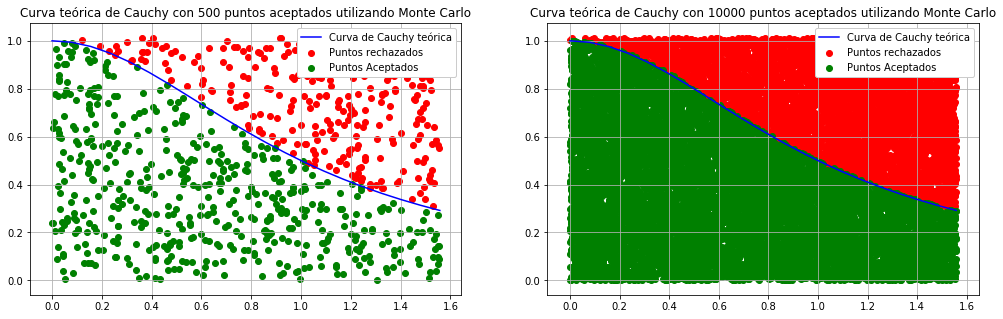

In [4]:
#Plot de Monte Carlo con 500 puntos aceptados.
x1,x2,y1,y2 = montecarlo(500,max_cauchy,np.tan(0),np.tan(1))

plt.figure(1,figsize=(17, 5))

plt.subplot(1,2,1)
plt.scatter(x2,y2,color='red',label='Puntos rechazados')
plt.scatter(x1,y1,color='green',label='Puntos Aceptados')
plt.plot(n_bins,cauchy_teo,color='blue',label='Curva de Cauchy teórica')
plt.title('Curva teórica de Cauchy con 500 puntos aceptados utilizando Monte Carlo')
plt.legend(['Curva de Cauchy teórica','Puntos rechazados','Puntos Aceptados'],loc='upper right',framealpha=1)
plt.grid()

#Plot con 10000 puntos aceptados.
x1,x2,y1,y2 = montecarlo(10000,max_cauchy,np.tan(0),np.tan(1))

plt.subplot(1,2,2)
plt.title('Curva teórica de Cauchy con 10000 puntos aceptados utilizando Monte Carlo')
plt.scatter(x2,y2,color='red',label='Puntos rechazados')
plt.scatter(x1,y1,color='green',label='Puntos Aceptados')
plt.plot(n_bins,cauchy_teo,color='blue',label='Curva de Cauchy teórica')
plt.legend(loc='upper right',framealpha=1)
plt.grid()
plt.show()

En la celda de abajo aprecia a la *izquierda* un histograma realizado con los datos generados anteriormente con la **función de transformación del problema 5** y la curva teórica de la distribución Cauchy para ese caso. Ambas construidas como se describió en la primer celda del problema. A la *derecha*, en cambio, se observa el histograma construído a partir del Método de Monte Carlo con 10.000 aceptaciones desarollado en la celda anterior.

El error en cada histograma fue calculado suponiendo que la probabilidad de que un dado punto caíga en un bin es baja y que la cantidad de puntos es muy alta, por lo que la **variable aleatoria: cantidad de puntos en un determinado bin** tiene una distribución de Poisson. Entonces el error que tienen es la raíz cuadrada de la cantidad de puntos en ese bin si no estuviese normalizado, pero al estarlo hay que multiplicar por un factor de normalización. Dicho factor de normalización es **1/(el ancho de cada bin por la cantidad de puntos)**.

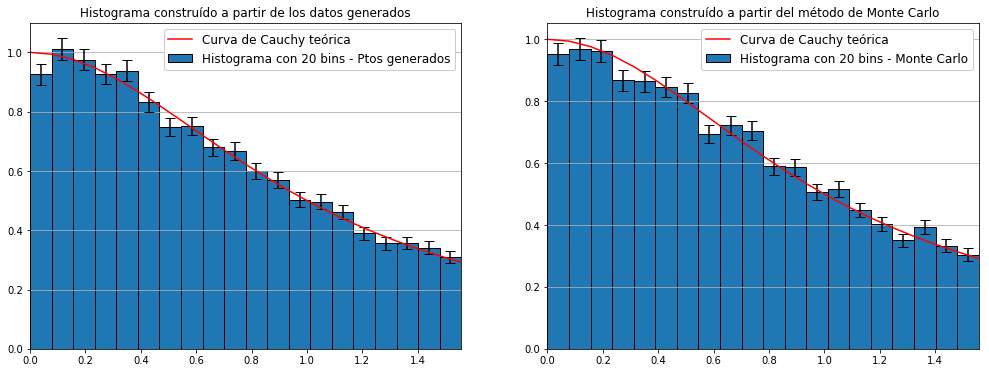

In [5]:
#Plot con los datos
plt.figure(2,figsize=(17, 6))
plt.subplot(1,2,1)
norm_bin1 = 1/(ancho_bin*len(cauchy_datos))
error_bin1 = np.sqrt(prob_cauchy*norm_bin1)
plt.bar(bins_cauchy[:-1],prob_cauchy,width=ancho_bin, ec='k',align='edge',yerr=error_bin1,capsize=5,label='Histograma con '+str(cant_bin)+' bins - Ptos generados')
plt.plot(n_bins,cauchy_teo,color='red',label='Curva de Cauchy teórica')
plt.legend(loc='upper right',framealpha=1,fontsize='large')
plt.xlim([np.tan(0),np.tan(1)])
plt.grid(axis='y')
plt.title('Histograma construído a partir de los datos generados')

#Plot con Monte Carlo
cant_bin = 20
ancho_bin = (np.tan(1)-np.tan(0))/cant_bin
n_bins = np.arange(np.tan(0),np.tan(1)+ancho_bin,ancho_bin)
cauchy_teo = sci.cauchy.pdf(n_bins,loc=0,scale=1)*factor_norm 
#Calculo el error de los bines
prob_y,bins_y = np.histogram(x1,bins=n_bins,density=True)
norm_bin2 = 1/(ancho_bin*len(x1))
error_bin2 = np.sqrt(prob_y*norm_bin2)

plt.subplot(1,2,2)
plt.bar(bins_y[:-1],prob_y,width=ancho_bin, ec='k',align='edge',yerr=error_bin2, capsize=5,label='Histograma con '+str(cant_bin)+' bins - Monte Carlo')
plt.plot(n_bins,cauchy_teo,color='red',label='Curva de Cauchy teórica')
plt.legend(loc='upper right',framealpha=1,fontsize='large')
plt.xlim([np.tan(0),np.tan(1)])
plt.grid(axis='y')
plt.title('Histograma construído a partir del método de Monte Carlo')
plt.show()

### Conclusiones
El método de generación de puntos es factible de realizar siempre y cuando se conozca la forma de generar los puntos, ya sea mediante una transformación o conociendo la distribución en forma analítica. Esto a veces no es posible ya sea porque no tiene directamente forma analítica o porque no la conosco, ya que la misma proviene de datos de los cuales no conosco la distribución. El método de Monte Carlo, en cambio, no necesita conocer la forma análitica de la distribución si no que alcanza con saber el valor que tiene en cada punto, ya que alcanza para comparar a la hora de hacer el método. Es muy útil para generar simulaciones de distribuciones exóticas. 

## Problema 2: Cuadrados mínimos y banda de error
En este ejercicio se tiene una serie de datos **(x,y)**, con errores en la variable y, y quiero determinar la mejor forma de ajustarlos con una **función lineal**. Además se analizará la conveniencia de utilizar dicho ajuste para predecir valores de y dado x. En caso de que se factible hacerlo en que rango es eficiente dicha predicción. Donde se entiende como eficiente, que el error relativo de la varible y no sea grande.

Se define la serie de datos dada por el problema. Luego se calculan los parámetros y su matriz de covarianza utilizando al formula de **cuadrados mínimos** sugerida. Se define una función que permite, utilizando propagación de errores calcular la varianza de y. Además el ejercicio propone a modo de prueba calcular la varianza de y **sin tener en cuenta el término de covarianza de a1 y a2** que surge de la formula de propagación de errores. Luego se propone comparar ambas métodos. *Es importante aclarar que la fórmula que utiliza el código para construir la varianza de y fue obtenida en forma analítica utilizando el ya antes mencionado método de propagación de errores.*

Además se encuentra el valor mínimo de la **varianza de y**, y que **valor de x** minimiza la varianza.

Los parametros son: a1 = 1.4522727272727562 a2 = 0.7990909090909043 y sigma = 0.3
La matriz de convarianza de a1 y a2 es:
[[ 0.51954545 -0.20454545]
 [-0.20454545  0.08181818]]
La varianza de y minima vale 0.008181818181818068 cuando x vale 2.5


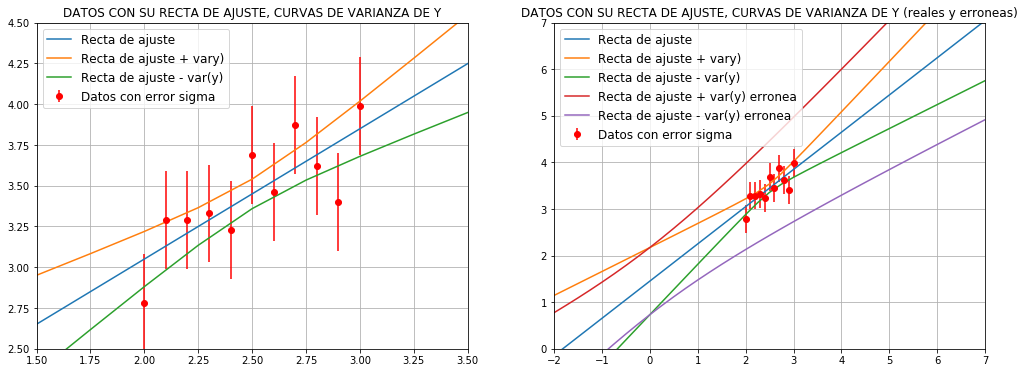

In [6]:
#Defino los datos y su error sigma
x_dato = np.array([2.00,2.10,2.20,2.30,2.40,2.50,2.60,2.70,2.80,2.90,3.00])
y_dato = np.array([2.78,3.29,3.29,3.33,3.23,3.69,3.46,3.87,3.62,3.40,3.99])
sigma = 0.3 

#Función que encuentra con cuadrados mínimos los parámetros de la func lineal y su matriz de covarianza
def parametros_a(x,y,sigma): 
    s_x = np.sum(x)
    s_y = np.sum(y)
    s2_x = np.sum(x**2)
    N = x.shape[0]
    delta = N*s2_x - s_x**2
    a1 = (s2_x*s_y - s_x*np.sum(x*y))/delta
    a2 = (N*np.sum(x*y) - s_x*s_y)/delta
    covarianza = np.matrix([[s2_x,-s_x],[-s_x,N]])*((sigma**2)/delta)
    return a1, a2, covarianza

#Obtengo los parametros de la lineal 
a1,a2, covarianza = parametros_a(x_dato,y_dato,sigma)

#Construyo la varianza de la variable y para distintos x y ademas devuelve el x en el cual la varianza es mínima
def var_y(x,covarianza):
    vary = 2*x*covarianza[1,0] + covarianza[0,0] + (x**2)*covarianza[1,1]
    min_vary = -covarianza[1,0]/covarianza[1,1]
    return vary, min_vary

#Construyo la varianza de la variable y para distintos x sin tener encuenta la covarianza
def var_y_erronea(x,covarianza):
    vary = + covarianza[0,0] + (x**2)*covarianza[1,1]
    return vary

print('Los parametros son: a1 =',a1,"a2 =",a2,'y sigma =',sigma)
print('La matriz de convarianza de a1 y a2 es:')
print(covarianza)

#Construyo las rectas y curvas para los plots
x = np.arange(-15,15,0.25)
y_m = a2*x+a1

#Construyo los vectores de varianza de y y de varianza de y erronea
vary, min_vary_x = np.array(var_y(x,covarianza))
vary_erronea = np.array(var_y_erronea(x,covarianza))
min_vary_y = var_y(min_vary_x,covarianza)[0]
sigma_y_pto = np.sqrt(var_y(0.5,covarianza)[0]) #sigma y en x = 0.5

print('La varianza de y minima vale',min_vary_y,"cuando x vale",min_vary_x )

#Plot 
plt.figure(figsize=(17, 6))
plt.subplot(1,2,1)
plt.errorbar(x_dato,y_dato,yerr=sigma, fmt='o',color='red',label='Datos con error sigma')
plt.plot(x,y_m,label='Recta de ajuste')
plt.plot(x,y_m + np.sqrt(vary),label='Recta de ajuste + vary)')
plt.plot(x,y_m - np.sqrt(vary),label='Recta de ajuste - var(y)')
plt.title('DATOS CON SU RECTA DE AJUSTE, CURVAS DE VARIANZA DE Y')
plt.legend(fontsize="large")
plt.xlim([1.5,3.5])
plt.ylim([2.5,4.5])
plt.grid()
plt.subplot(1,2,2)
plt.errorbar(x_dato,y_dato,yerr=sigma, fmt='o',color='red',label='Datos con error sigma')
plt.plot(x,y_m,label='Recta de ajuste')
plt.plot(x,y_m + np.sqrt(vary),label='Recta de ajuste + vary)')
plt.plot(x,y_m - np.sqrt(vary),label='Recta de ajuste - var(y)')
plt.plot(x,y_m + np.sqrt(vary_erronea),label='Recta de ajuste + var(y) erronea')
plt.plot(x,y_m - np.sqrt(vary_erronea),label='Recta de ajuste - var(y) erronea')
plt.title('DATOS CON SU RECTA DE AJUSTE, CURVAS DE VARIANZA DE Y (reales y erroneas)')
plt.legend(fontsize="large")
plt.xlim([-2,7])
plt.ylim([0,7])
plt.grid()

En el gráfico de la izquierda se observan los datos con sus respectivos errores, la recta de ajuste con los paramétros a1 y a2 y las bandas de error teniendo en cuenta la **cov(a1,a2)** como se describió en la celda anterior. 

En el gráfico de la derecha se observan además las cuervas **sin tener cuenta el término de la cov(a1,a2)**. Se gafica desde una escala más alejada que permite observar algunas cosas interesantes. A a mayor distancia de los datos, los valores de y que predice el ajuste tienen una varianza cada vez más grande y además queda claro que cerca de los puntos, si no se tiene en cuenta el término de la covarianza se sobreestima el error por mucho.

Además, una cuestión interesante es ver que el valor donde la varianza de y es minima es igual al promedio de los datos x. 

En la siguiente se calcula el error relativo de los puntos de y, donde se observa como crece de forma lineal y donde toma un mínimo en 2.5 que es el promedio de los datos de x.

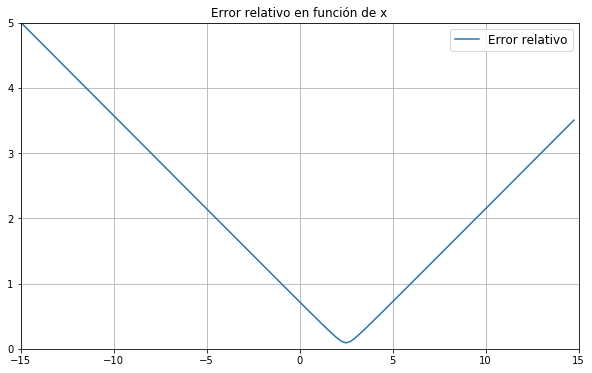

In [7]:
#Se calcula el error relativo y se hace un plot
error_relativo = (np.sqrt(vary)*y_m)/y_m
plt.figure(figsize=(10, 6))
plt.plot(x,error_relativo,label='Error relativo')
plt.ylim([0,5])
plt.xlim([-15,15])
plt.legend(fontsize='large')
plt.title('Error relativo en función de x')
plt.grid()

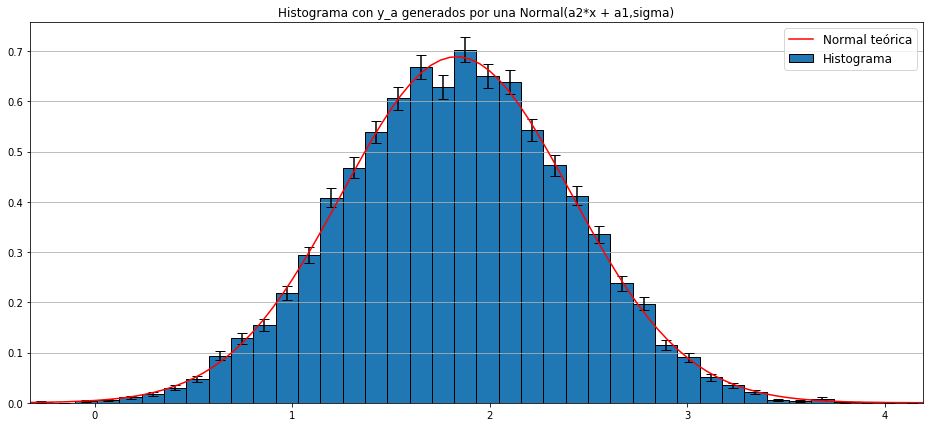

In [9]:
#Para generar utilizo los datos del item anterior.
x_gen = x_dato
ptos_y = []
errores_y = []
for j in range(10000):
    y_gen = []
    #Genera los yi aleatorios con normal(mu,sigma)
    for i in range(x_gen.shape[0]):
        mu = (a2*x_gen[i] + a1)
        y_gen.append(sci.norm.rvs(mu,sigma))
    y_gen = np.array(y_gen) 
    
    #Construye los a1 y a2 nuevos
    a1_new, a2_new, covarianza_new = parametros_a(x_gen,y_gen,sigma) 
        
    #Obtiene la varianza para y
    x = np.arange(-15,15,0.25)
    vary_new, min_vary_x_new = np.array(var_y(x,covarianza_new))
    
    #Busca para el x = 0.5 el valor de y predicho y su error
    pto = 0.5
    y_pto = pto*a2_new + a1_new
    err_y_pto = var_y(pto,covarianza_new)[0]
    ptos_y.append(y_pto)
    errores_y.append(err_y_pto)
    
#Convierte en array las listas de datos
ptos_y = np.array(ptos_y)
errores_y = np.array(errores_y)
y_mean = np.mean(ptos_y)

#Construyo el histograma 
cant_bin = 40
ancho_bin = (np.max(ptos_y)-np.min(ptos_y))/cant_bin
n_bins = np.arange(np.min(ptos_y),np.max(ptos_y)+ancho_bin,ancho_bin)
prob_y,bins_y = np.histogram(ptos_y,bins=n_bins,density=True)
normaliza_bin = 1/(ancho_bin*ptos_y.shape[0])
errorDelBin = np.sqrt(prob_y*normaliza_bin)

#Construyo la normal teórica
x_normal = np.arange(-20,20,0.05)
y_normal = sci.norm.pdf(x_normal,y_mean,sigma_y_pto)

#Plot
plt.figure(figsize=(16, 7))
plt.bar(bins_y[:-1],prob_y,width=ancho_bin, ec='k',align='edge',yerr=errorDelBin, capsize=5, label='Histograma')
plt.plot(x_normal,y_normal,color='red',label='Normal teórica')
plt.xlim([np.min(ptos_y),np.max(ptos_y)])
plt.ylim([0,np.max(y_normal)*1.1])
plt.grid(axis='y')
plt.legend(fontsize='large')
plt.title('Histograma con y_a generados por una Normal(a2*x + a1,sigma)')
plt.show()

Se toma la serie de datos de x, utilizando los parametros a1 y a2 del item anterior y se generan valores de y para cada x utilzando una **distribución Normal que tiene como esperanza y = a2.x + a1 y como el sigma el de los datos (sigma = 0,3)**. A estos nuevos valores de y se les vuelve a aplicar el ajuste con una **función lineal que lógicamente tiene nuevos parámetros a1,a2**. Después con los **nuevos** parámetros se obtiene un valor de y con x = 0.5. Queda claro que estos valores de y son una **variable aleatoria** ya que provienen de un ajuste en el cuál los valores a1 y a2 son **también son aleatorios** porque provienen en cada caso de un ajuste distinto. Se repite el proceso unas 10.000 veces y con esos valores de y obtenidos se construye un histograma. 

Al histograma se le superpone una distribución normal que tiene como esperanza el promedio de los y generados y como sigma **la raíz cuadrada de la varianza de y que predecía el ajuste original de los datos**.

Cada bin del histograma nuevamente tiene un error poissoneano por lo ya discutido anteriormente.